In [1]:
from nn_architectures import Model1, Model2, Model3, Model4, Model5
from utils import *
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Loading and Preprocessing Data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

cols_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']
X_train = train_data.drop(cols_to_drop, axis=1).iloc[:, 1:]
y_train = train_data['Survived']
X_test = test_data.drop(cols_to_drop, axis=1)
y_test = pd.read_csv('data/gender_submission.csv').drop('PassengerId', axis=1)

In [3]:
embarked_labels = X_train['Embarked'].unique().copy()
sex_labels = X_train['Sex'].unique().copy()

for x in [X_train, X_test]:
    x.dropna(inplace=True)
    x['Embarked'] = x['Embarked'].map({e: i for i, e in enumerate(embarked_labels)})
    x['Sex'] = x['Sex'].map({e: i for i, e in enumerate(sex_labels)})

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [4]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(dim=1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), shuffle=False)

# Training Models

## Model 1

Epoch 1: Batch Loss - 14.255179405212402                    

Accuracy: 0.6254
Recall: 0.4803
Precision: 0.5126
F1: 0.4959


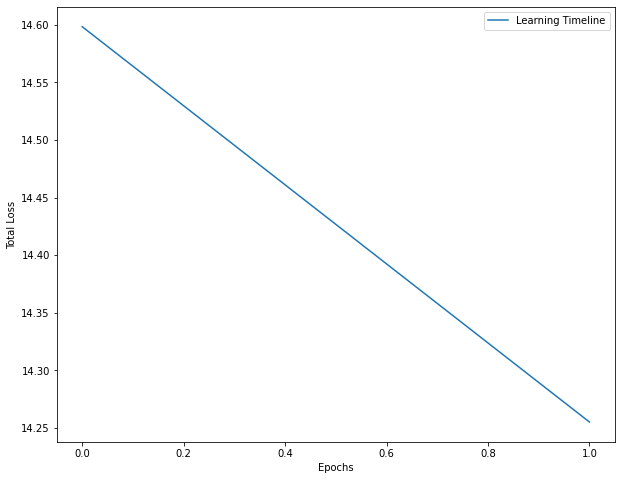

In [5]:
evaluate_model(Model1(X_train.shape[1]), train_loader, X_test, y_test, 800, 'model1')

## Model 2

Epoch 1: Batch Loss - 14.155597686767578                    

Accuracy: 0.6163
Recall: 0.0000
Precision: 0.0000
F1: 0.0000


c:\Users\Mykhailo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


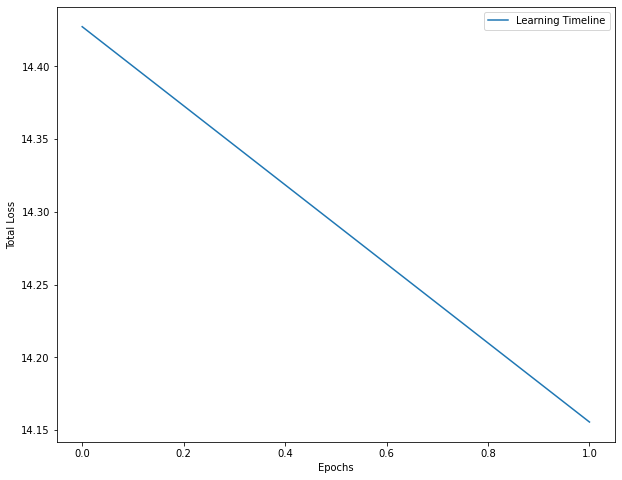

In [6]:
evaluate_model(Model2(X_train.shape[1]), train_loader, X_test, y_test, 800, 'model2')

## Model 3

Epoch 1: Batch Loss - 14.196516036987305                    

Accuracy: 0.6103
Recall: 0.6299
Precision: 0.4938
F1: 0.5536


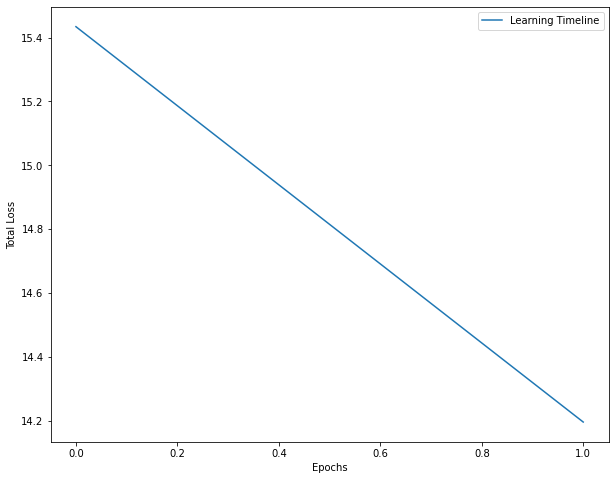

In [7]:
evaluate_model(Model3(X_train.shape[1]), train_loader, X_test, y_test, 800, 'model3')

## Model 4

Epoch 1: Batch Loss - 14.098742485046387                    

Accuracy: 0.6254
Recall: 0.5591
Precision: 0.5108
F1: 0.5338


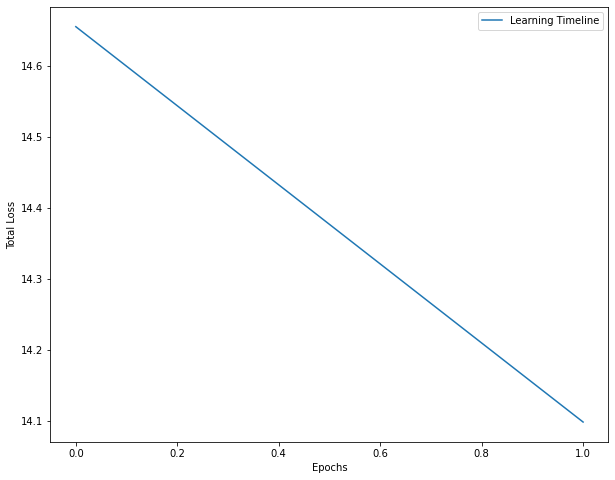

In [8]:
evaluate_model(Model4(X_train.shape[1]), train_loader, X_test, y_test, 800, 'model4')

## Model 5

Epoch 1: Batch Loss - 14.12521743774414                    

Accuracy: 0.6556
Recall: 0.3543
Precision: 0.5844
F1: 0.4412


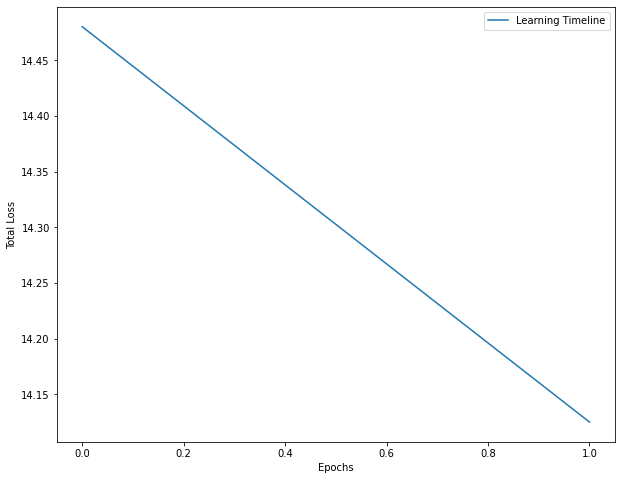

In [9]:
evaluate_model(Model5(X_train.shape[1]), train_loader, X_test, y_test, 800, 'model5')